In [1]:
import networkx as nx
from networkx.generators.random_graphs import _random_subset
import sympy as sp
from sympy import symbols 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import copy
import random as rd

In [2]:
G = nx.read_adjlist("BA.adjlist")

In [3]:
N = len(G.nodes)

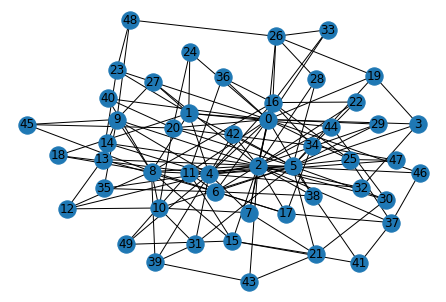

In [4]:
nx.draw(G, with_labels=True)    
plt.show()

In [5]:
adjacency = list(G.adjacency())

In [6]:
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)]

for a, b in adjacency :
    a = int(a)
    for c in b :
        c = int(c)
        A[a][c] = 1

In [7]:
index = []
for i in range(N):
    for j in range(i+1, N):
        if A[i][j] == 1:
            index += [(i,j)]

removed_link = index[rd.randint(0, len(index)-1)]
links = len(index) - 1

In [8]:
print("It was removed the link between node", removed_link[0], "and node", removed_link[1])

It was removed the link between node 8 and node 40


In [9]:
A[removed_link[0]][removed_link[1]] = 0
A[removed_link[1]][removed_link[0]] = 0

In [10]:
W = symbols(f'w:{links}')
print("There are", links, "indipendent weights")

There are 140 indipendent weights


In [11]:
count = 0
P = copy.deepcopy(A)
for i in range(N):
    for j in range(i+1, N):
        if P[i][j] == 1:
            P[i][j] = W[count]
            P[j][i] = W[count]
            count += 1

In [12]:
with open("BA-pS.txt", "r") as file:
    pS = file.read()
    pS = pS.split("\n")
pS = [float(i) for i in pS]
pS = np.round(pS, 5)

In [13]:
e = (np.dot(pS, P) - pS)**2
E = e[0]
for i in range(1, len(e)):
    E += e[i]

In [14]:
from scipy.optimize import minimize
from sympy.utilities.lambdify import lambdify

my_func = lambdify(W, E)

def my_func_v(x):
    return my_func(*tuple(x))

x0 = [1]*links
solution = minimize(my_func_v, x0, bounds = [[0, np.inf]]*len(x0)).x

In [15]:
count = 0
P_new = copy.deepcopy(A)
for i in range(N):
    for j in range(i+1, N):
        if P_new[i][j] == 1:
            P_new[i][j] = solution[count]
            P_new[j][i] = solution[count]
            count += 1

In [16]:
matrixP = np.array(P_new)

In [17]:
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)

In [26]:
for i in range(N):
    if np.round(autovaloriP[i], 4) == 1:
        pS_new = autovettoriP[i]
        print("Eigenvector found")
        break
if pS_new[0] < 0:
    pS_new = -pS_new

Eigenvector found


In [27]:
pS_new = pS_new.real

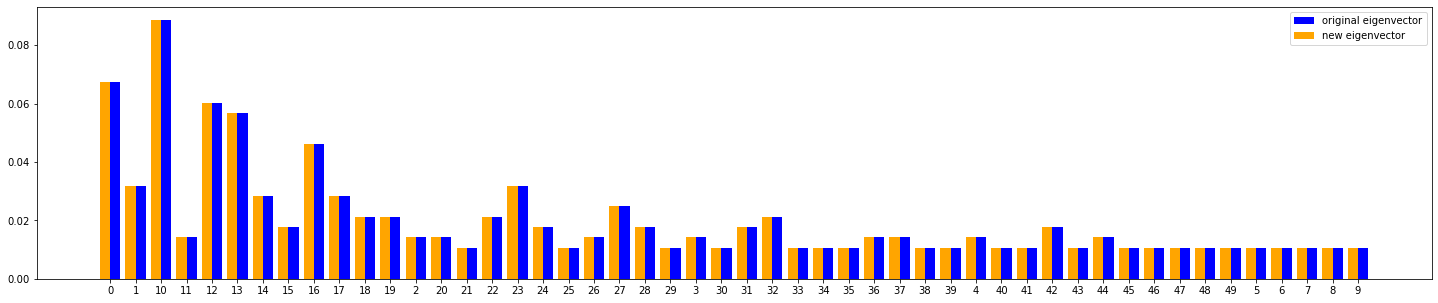

In [28]:
fig, ax = plt.subplots(figsize=(0.5*N, 5))

pSNorm = [h/sum(pS) for h in pS]
pSNorm_new = [h/sum(abs(pS_new)) for h in pS_new]
nodes = sorted([n for n in G.nodes])

ax.bar(nodes, pSNorm, width=0.4, align='edge', color='blue', label="original eigenvector")
ax.bar(nodes, pSNorm_new, width=-0.4, align='edge', color='orange', label="new eigenvector")

ax.set_xticks(np.arange(0, N, 1))
ax.legend()
plt.show()

In [29]:
for i in range(len(P_new)):
    print(sum(P_new[i]))

1.2778288743899688
1.0143171107693272
1.8388376504284014
1.1329524777593218
1.2310928395802625
1.2016458840196933
1.152462533039253
0.6696477059381416
0.9319422238038784
1.2538748460465525
1.1884031847626833
1.0722932276524468
0.7349197960045593
0.8521695135177609
0.370479970109944
0.9770614339928752
1.2092687178918582
0.7214438848761004
0.2834370735193083
0.8247818743067968
1.345471173167298
1.0651920106651347
0.3209916380022676
0.8537443037149974
0.3629766002763426
0.8310602710391517
1.4129017392619565
0.31751013192933714
0.46047658882041403
0.1753360238166551
0.8825597057002675
0.8193019254947862
0.6514229217669376
0.4112989148468669
0.8190616758442533
0.3389321942995933
0.4194233399289111
1.267639717492138
0.3710980853104933
0.9584542266910822
0.4255147147049401
0.5244906890012229
0.1801566910481922
0.6838490289217274
0.5871988102532842
0.37746537305756744
0.5244726899207705
0.6673226342722942
0.6072284731790527
0.47635621421256263
